# Code accompanying *Perceptual Thresholds for Differences in CT Noise Texture*, 
## Published in Journal of Medical Imaging

Below is example code to perform the fitting and calculate the peak-frequency, and sigma as described in the manuscript above.  
To apply this on data measured, change the frequency and nps arrays in the cell below and run all cells.


Luuk Oostveen, luuk.oostveen@radboudumc.nl


In [1]:
# Included packages needed for procedures below
from scipy.optimize import fsolve, minimize, minimize_scalar, bracket, curve_fit
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Change values below for other NPS shapes

frequency = np.array([0.0, 0.03125, 0.0625, 0.09375, 0.125, 0.15625, 0.1875, 0.21875, 0.25, 0.28125, 0.3125, 0.34375, 0.375, 0.40625, 0.4375, 0.46875, 0.5, 0.53125, 0.5625, 0.59375, 0.625, 0.65625, 0.6875, 0.71875, 0.75, 0.78125, 0.8125, 0.84375, 0.875, 0.90625, 0.9375, 0.96875, 1.0, 1.03125, 1.0625, 1.09375, 1.125, 1.15625, 1.1875, 1.21875, 1.25, 1.28125, 1.3125, 1.34375, 1.375, 1.40625, 1.4375, 1.46875, 1.5, 1.53125, 1.5625, 1.59375, 1.625, 1.65625, 1.6875, 1.71875, 1.75, 1.78125, 1.8125, 1.84375, 1.875, 1.90625, 1.9375, 1.96875, 2.0, 2.03125, 2.0625, 2.09375, 2.125, 2.15625, 2.1875, 2.21875, 2.25, 2.28125, 2.3125, 2.34375, 2.375, 2.40625, 2.4375, 2.46875, 2.5, 2.53125, 2.5625, 2.59375, 2.625, 2.65625, 2.6875, 2.71875, 2.75, 2.78125, 2.8125, 2.84375, 2.875, 2.90625, 2.9375, 2.96875, 3.0, 3.03125, 3.0625, 3.09375, 3.125, 3.15625, 3.1875, 3.21875, 3.25, 3.28125, 3.3125, 3.34375, 3.375, 3.40625, 3.4375, 3.46875, 3.5, 3.53125, 3.5625, 3.59375, 3.625, 3.65625, 3.6875, 3.71875, 3.75, 3.78125, 3.8125, 3.84375, 3.875, 3.90625, 3.9375, 3.96875, 4.0, 4.03125, 4.0625, 4.09375, 4.125, 4.15625, 4.1875, 4.21875, 4.25, 4.28125, 4.3125, 4.34375, 4.375, 4.40625, 4.4375, 4.46875, 4.5, 4.53125, 4.5625, 4.59375, 4.625, 4.65625, 4.6875, 4.71875, 4.75, 4.78125, 4.8125, 4.84375, 4.875, 4.90625, 4.9375, 4.96875, 5.0, 5.03125, 5.0625, 5.09375, 5.125, 5.15625, 5.1875, 5.21875, 5.25, 5.28125, 5.3125, 5.34375, 5.375, 5.40625, 5.4375, 5.46875, 5.5, 5.53125, 5.5625, 5.59375, 5.625, 5.65625, 5.6875, 5.71875, 5.75, 5.78125, 5.8125, 5.84375, 5.875, 5.90625, 5.9375, 5.96875, 6.0, 6.03125, 6.0625, 6.09375, 6.125, 6.15625, 6.1875, 6.21875, 6.25, 6.28125, 6.3125, 6.34375, 6.375, 6.40625, 6.4375, 6.46875, 6.5, 6.53125, 6.5625, 6.59375, 6.625, 6.65625, 6.6875, 6.71875, 6.75, 6.78125, 6.8125, 6.84375, 6.875, 6.90625, 6.9375, 6.96875, 7.0, 7.03125, 7.0625, 7.09375, 7.125, 7.15625, 7.1875, 7.21875, 7.25, 7.28125, 7.3125, 7.34375, 7.375, 7.40625, 7.4375, 7.46875, 7.5, 7.53125, 7.5625, 7.59375, 7.625, 7.65625, 7.6875, 7.71875, 7.75, 7.78125, 7.8125, 7.84375, 7.875, 7.90625, 7.9375, 7.96875])
nps = np.array([0, 0.000260379641138056, 0.000601721350335853, 0.000797467027674813, 0.000898540925399163, 0.000974931635694729, 0.00107980793672409, 0.00117950839036306, 0.00127220063808779, 0.00141936621607667, 0.00158086793176568, 0.00174825900719877, 0.00179603694489961, 0.00188366852891073, 0.00202144318608216, 0.00214384718885378, 0.00229436883769098, 0.00246204867021087, 0.00262178292242923, 0.00274983151264148, 0.00282858925701671, 0.00297528829887975, 0.0030469992176754, 0.0031923230457842, 0.00330340079302237, 0.00344512876295215, 0.00361165610214107, 0.00365496647620581, 0.00370252423333024, 0.00381388896991915, 0.00398784812901602, 0.00419755677360409, 0.00433729126092353, 0.00451016268500532, 0.00459288223062025, 0.00474707461692397, 0.00481961471769221, 0.00494645234970163, 0.00507314876574022, 0.00520425116978039, 0.00532339611798915, 0.00535311683212183, 0.00552760378003044, 0.00565801904142655, 0.00584031067091655, 0.0059966372980842, 0.00611529466566993, 0.00628703623598286, 0.00644818365210077, 0.00659558895825675, 0.00674507690984484, 0.0067946239942901, 0.00694821087542354, 0.00699208600432608, 0.00709732207927577, 0.00713283204103062, 0.00716820372566997, 0.00740032614918574, 0.00754544582800757, 0.00774456077944353, 0.00782568236582097, 0.00784633698562017, 0.0079942937555748, 0.00804788360586963, 0.00810930696114325, 0.00808805580896453, 0.00810556286031793, 0.00830438228931355, 0.0083686680230826, 0.0085338157516687, 0.00861719592944916, 0.00863092728038826, 0.00875703773917223, 0.0087290073892037, 0.00883230511513667, 0.00888739117047576, 0.00893063901807661, 0.0089402457020963, 0.00891206567046134, 0.00894819969150509, 0.00892160698990558, 0.00899149125279946, 0.00904090148129927, 0.00906333622868542, 0.00900917962827755, 0.00897308152759113, 0.00903145820080059, 0.00901232138895773, 0.0089533774925149, 0.0088613274517177, 0.0088074662116896, 0.00882782920821115, 0.00885928334282874, 0.00883795282482695, 0.00878817668416785, 0.00878958451759024, 0.0087378821579985, 0.00868523339904004, 0.0086851542421228, 0.00861797904530144, 0.00859393648024015, 0.00848181244674692, 0.00839214822520329, 0.00837786684192306, 0.00826394573072563, 0.00811227477164493, 0.00790507998845882, 0.00786647364247646, 0.00789775333275325, 0.00782218331002544, 0.00776340592641485, 0.00758103673487904, 0.0075068276427419, 0.00740957678573167, 0.00737056519067852, 0.00735045438265392, 0.0071991814692065, 0.00710765590070379, 0.00699683964187356, 0.00688630979492665, 0.00677446890574774, 0.00660149854712616, 0.00650077560899388, 0.00633864923124626, 0.00622506619731249, 0.00615411305660552, 0.00598825397889222, 0.00588665775305287, 0.00573886552201656, 0.00563236456500571, 0.00551239686046805, 0.00537463890214433, 0.00531382335487716, 0.0052200457654937, 0.00513979300615812, 0.00504480716927015, 0.00496056118925461, 0.00488511103256602, 0.00478253658687034, 0.00460039566814023, 0.00449043209862424, 0.00437979197081958, 0.00429156919140668, 0.00421367074065346, 0.00412361437892672, 0.00397579171348514, 0.00386343688376548, 0.00376248007956424, 0.00367205865948482, 0.00359521748014448, 0.00345919949400302, 0.00337669655594209, 0.00327324648415401, 0.00319501541200038, 0.00310082464116874, 0.00301001553284303, 0.00296446347296306, 0.00288208860187398, 0.00279738600523806, 0.00271152906934275, 0.00262883343166399, 0.00256333738772866, 0.00248071730102784, 0.00242039457166983, 0.00233897202739718, 0.002259254368103, 0.00220168566334462, 0.00213826889043502, 0.00209001653505359, 0.00201216736719221, 0.00193707889332651, 0.00187355679727642, 0.00181219815800633, 0.0017719030369328, 0.00171291895230126, 0.00164539392065792, 0.00158175157609746, 0.00152153696561731, 0.00147920543562948, 0.0014373705768331, 0.00138780179482005, 0.00133358293968556, 0.00128198378530138, 0.00123933997790858, 0.00119290202468063, 0.00115463467017369, 0.00111207278873486, 0.00107106594365672, 0.00103196519236311, 0.000994620336429507, 0.000962879062571161, 0.000921368113683041, 0.0008827164432136, 0.000844315734085293, 0.000808145400542108, 0.000772632668397178, 0.00073512628118614, 0.000706654962086563, 0.000677758438747942, 0.000653558862329705, 0.000625380707546445, 0.000597549454587629, 0.000574291930157318, 0.000545017117418957, 0.000518149735173882, 0.000492922755021686, 0.000468237282392237, 0.000445362322281307, 0.000422534717544794, 0.000403945722562441, 0.000384253912659519, 0.000369914371176189, 0.000350564929437763, 0.000333463124061525, 0.000318360583417028, 0.000305376859143079, 0.000293586211698636, 0.000277918096502586, 0.00026534170001008, 0.000253421071057471, 0.000241400313062219, 0.000230126564112872, 0.000218521446161994, 0.000210239207119848, 0.00020287474956548, 0.000194359869792199, 0.000188472533782101, 0.000180958667569572, 0.00017385087592349, 0.000165700970217095, 0.000162168930939074, 0.000158748827788969, 0.000154545640544949, 0.000148909372361377, 0.000147222308570366, 0.000146314720417351, 0.000145949782809963, 0.00014255324727269, 0.000140525416687057, 0.000140671508176335, 0.000141061419873119, 0.00014107421695956, 0.000142107814001297, 0.000142480584451193, 0.00014460836408746, 0.000146856164953828, 0.000147363562037342, 0.000151365523539372, 0.000154951039147923, 0.000157250183507862, 0.000159830462755719, 0.000165430726278807, 0.000170563415780393, 0.000174941591690266, 0.000175954331718394, 0.000179457781089464])

In [3]:
# Functions needed for calculations
f_peak = None

def gaussian_function(x, a, sigma):
    '''
    Just a normal gaussian function, using the global f_peak
    
    x: np-array with x-values (frequencies)
    a: amplitude
    sigma: sigma of gaussian
    return: gaussian function
    '''
    return a*np.exp(-(x-f_peak)**2/(2 * sigma**2))


def nps_2param_function(x, a, alpha, beta):
    '''
    2-parameter function (3 including a) for fitting the NPS
    
    x: np-array with x-values (frequencies)
    a: amplitude
    alpha: parameter of function
    beta: parameter of function
    return: np-array with 2-parameter fitted NPS
    '''
    return a * x * np.exp(-(x-alpha)**2/(2 * beta**2))


def nps_5param_function(x, a, b, c, d, alpha, beta):
    '''
    5-parameter function (6 including a) for fitting the NPS
    
    x: np-array with x-values (frequencies)
    a: amplitude
    b: parameter of function (power of x)
    c: parameter of function (power of x in exponent)
    d: parameter of function (power of (x**c-alpha) in exponent)
    alpha: parameter of function
    beta: parameter of function
    return: np-array with 5-parameter fitted NPS
    '''
    return a * x ** b * np.exp(-(np.abs(x ** c - alpha) ** d) / (2 * beta ** 2))


def smooth_nps(nps, bandlimit = 0.04):
    '''
    Apply lowpass-filter on NPS
    
    bandlimit: fraction of full bandwidth that passes lowpass-filter
    return: np-array with lowpass-filtered NPS
    '''
    bandlimit_index = int(bandlimit * nps.size)
    f_nps = np.fft.fft(nps)
    for i in range(bandlimit_index + 1, len(f_nps) - bandlimit_index ):
        f_nps[i] = 0
    nps_filtered = np.fft.ifft(f_nps)
    return np.real(nps_filtered)


def get_fav_peak_sigma(freq, nps, f_peak_smooth=None, show_curves=False):
    '''
    Get parameters average frequency, peak frequency, and sigma
    
    freq: np-array with frequencies of nps
    nps: np-array with values of nps
    f_peak_smooth: Peak frequency of smoothed NPS
    show_curves: show the curves of original NPS, half gaussian, and peak frequency
    return: average frequency, peak frequency, sigma
    '''
    global f_peak
    
    peak_pos = np.argmax(nps)
    f_peak = freq[peak_pos]
    if f_peak_smooth:
        f_peak = f_peak_smooth
        peak_pos = np.where(freq==f_peak)[0][0]
    
    a_gaus = None
    sigma_gaus = None
    popt = None
    if peak_pos < (len(freq) - 10):
        # don't try to fit (half-)gaussian if we have less than 10 points (10 is (very) arbitrary)
        popt, pcov = curve_fit(f=gaussian_function, 
                               xdata=freq[peak_pos:], 
                               ydata=nps[peak_pos:],
                               maxfev=9000000,
                              )
        a_gaus = popt[0]
        sigma_gaus = popt[1]
    
    if show_curves:
        plt.figure()
        plt.plot(freq, nps, label='Original NPS')
        if popt is not None and popt.any(): 
            plt.plot(freq[peak_pos:], gaussian_function(freq[peak_pos:], *popt), label='Half Gaussian fit')
        plt.plot([f_peak, f_peak], [0, nps[peak_pos]], color='black', linestyle='--', label='peak frequency')
        plt.legend()
        plt.show()

    f_av = np.dot(freq, nps) / nps.sum()
    
    return f_av, f_peak, sigma_gaus


def get_param_nps(freq, nps, param5=False, show_curves=False):
    '''
    Fit the NPS with 2/5 parameters (excluding magnitude)
    
    freq: np-array of frequencies of nps
    nps: np-array with values of nps
    param5: fit using the 5 parametrized nps function (otherwise use 2 parameter fit)
    show_curves: show fit curves if True
    return: average frequency of fit, peak frequency of fit, sigma of fit, r squared, np-array with fitted nps values
            popt-values
    '''
    if not param5:
        popt, pcov = curve_fit(f = nps_2param_function,
                               xdata = freq,
                               ydata = nps,
                               maxfev=9000000,
                              )
        a = popt[0]
        alpha = popt[1]
        beta = popt[2]
        return_popt = popt
        f_peak = (np.sqrt(4*beta**2+alpha**2)+alpha)/2
        nps_param = nps_2param_function(freq, *popt)
    else:
        popt, pcov = curve_fit(f = nps_5param_function,
                               xdata = freq,
                               ydata = nps,
                               maxfev=9000000,
                              )
        a = popt[0]
        b = popt[1]
        c = popt[2]
        alpha = popt[3]
        beta = popt[4]
        nps_param = nps_5param_function(freq, *popt)
        f_peak = freq[np.argmax(nps_param)]
        return_popt = popt
        
    nps_param = nps_param/nps_param.sum()
        
    # calculate r**2 (although this might not be valid for non-linear regression)
    residuals = nps - nps_param
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((nps_param-np.mean(nps_param))**2)
    r_squared = 1 - (ss_res / ss_tot)
        
    # get average frequency
    f_av = np.dot(freq, nps_param) / nps_param.sum()

    # get sigma
    a_gaus = None
    sigma_gaus = None
    peak_pos = np.where(freq>f_peak)
    if len(peak_pos)>0 and len(peak_pos[0] > 0):
        peak_pos = np.where(freq>f_peak)[0][0]
        if peak_pos < (len(freq) - 10):
            # don't try to fit (half-)gaussian if we have less than 10 points (10 is (very) arbitrary)
            popt, pcov = curve_fit(f=gaussian_function, 
                                   xdata=freq[peak_pos:], 
                                   ydata=nps[peak_pos:],
                                   maxfev=9000000,
                                  )
            a_gaus = popt[0]
            sigma_gaus = popt[1]
    
    
    if show_curves:
        plt.figure()
        plt.plot(freq, nps, label='Original NPS')
        if param5:
            plt.plot(freq, nps_param, label='5-param NPS fit')
        else:
            plt.plot(freq, nps_param, label='2-param NPS fit')
        plt.plot(freq[peak_pos:], gaussian_function(freq[peak_pos:], *popt), label='Half Gaussian fit')
        plt.plot([f_peak, f_peak], [0, nps[peak_pos]], color='black', linestyle='--', label='peak frequency')
        plt.legend()
        plt.show()

    
    return f_av, f_peak, sigma_gaus, r_squared, nps_param, return_popt

**** Results from original NPS ****


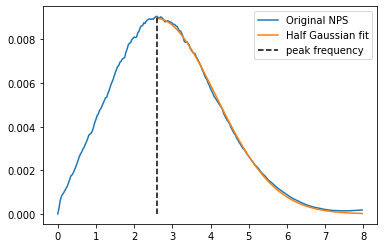

	Average frequency: 2.89
	Peak frequency: 2.59
	Sigma: 1.54


**** Results from original NPS. However, peak frequency determined on smoothed NPS ****


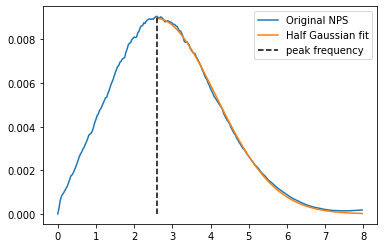

	Average frequency: 2.89
	Peak frequency: 2.59
	Sigma: 1.54


**** Results from 2 parameter fit ****


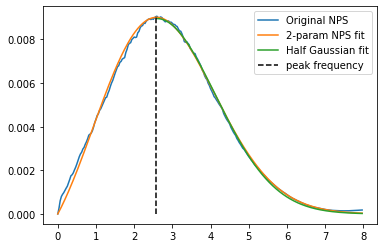

	2-param average frequency: 2.91
	2-param peak frequency: 2.58
	2-param sigma: 1.54
	R squared: 0.998
	Fit parameters:
		alpha: 1.36
		beta: 1.78


**** Results from 5 parameter fit ****


C:\Users\z627112\AppData\Local\Temp\ipykernel_11548\1158060668.py:42: RuntimeWarning: divide by zero encountered in power
  return a * x ** b * np.exp(-(np.abs(x ** c - alpha) ** d) / (2 * beta ** 2))


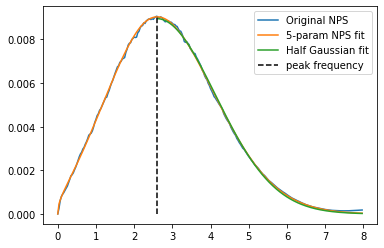

	5-param average frequency: 2.88
	5-param peak frequency: 2.59
	5-param sigma: 1.54
	R squared: 1.0
	Fit parameters:
		b: 0.437
		c: 0.979
		d: 1.9
		alpha: 2.22
		beta: 1.42


In [4]:
# get average frequency, peak frequency, and sigma
print('**** Results from original NPS ****')
f_av, f_peak, sigma = get_fav_peak_sigma(frequency, nps, show_curves=True)
print(f'\tAverage frequency: {f_av:.3}')
print(f'\tPeak frequency: {f_peak:.3}')
if sigma:
    print(f'\tSigma: {sigma:.3}\n')
else:
    print(f'\tSigma: n.a.\n')

# get average frequency, peak frequency, and sigma, but first smooth curve, to get peak frequency
print('\n**** Results from original NPS. However, peak frequency determined on smoothed NPS ****')
nps_smooth = smooth_nps(nps)
f_peak_smooth = frequency[np.argmax(smooth_nps)]
f_av_s, f_peak_s, sigma_s = get_fav_peak_sigma(frequency, nps, show_curves=True)
print(f'\tAverage frequency: {f_av_s:.3}')
print(f'\tPeak frequency: {f_peak_s:.3}')
if sigma_s:
    print(f'\tSigma: {sigma_s:.3}\n')
else:
    print(f'\tSigma: n.a.\n')

# Fit nps with 2 parameter function
print('\n**** Results from 2 parameter fit ****')
f_av_param2, f_peak_param2, sigma_param2, r_squared_param2, param2_nps, popt2 = \
    get_param_nps(frequency, nps, param5=False, show_curves=True)
print(f'\t2-param average frequency: {f_av_param2:.3}')
print(f'\t2-param peak frequency: {f_peak_param2:.3}')
if sigma_param2:
    print(f'\t2-param sigma: {sigma_param2:.3}')
else:
    print(f'\t2-param sigma: n.a.')
print(f'\tR squared: {r_squared_param2:.3}')
print('\tFit parameters:')
print(f'\t\talpha: {popt2[1]:.3}')
print(f'\t\tbeta: {popt2[2]:.3}\n')

# Fit nps with 5 parameter function
print('\n**** Results from 5 parameter fit ****')
f_av_param5, f_peak_param5, sigma_param5, r_squared_param5, param5_nps, popt5 = \
    get_param_nps(frequency, nps, param5=True, show_curves=True)
print(f'\t5-param average frequency: {f_av_param5:.3}')
print(f'\t5-param peak frequency: {f_peak_param5:.3}')
if sigma_param5:
    print(f'\t5-param sigma: {sigma_param5:.3}')
else:
    print(f'\t5-param sigma: n.a.')
print(f'\tR squared: {r_squared_param5:.3}')
print('\tFit parameters:')
print(f'\t\tb: {popt5[1]:.3}')
print(f'\t\tc: {popt5[2]:.3}')
print(f'\t\td: {popt5[3]:.3}')
print(f'\t\talpha: {popt5[4]:.3}')
print(f'\t\tbeta: {popt5[5]:.3}')

